In [1]:
#Import Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#import Files
file ='resources/all_data_final.csv'
alldata = pd.read_csv(file)

In [3]:
linear1={}
multilinear2={}
multilinear3={}
multilinear4={}

# Regression on All Factors

In [4]:
#Perform Linear Regression on every variable
results ={}
for value in alldata.columns[4:]:
    #Choose columns
    fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
    X = fewdata[value].values.reshape(-1, 1)
    y = fewdata["Life Expectancy"].values.reshape(-1, 1)
    
    #Split Data into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    results[value] = {"Training Score":training_score,"Testing Score": testing_score, "Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
scores = pd.DataFrame(results)
linearall = scores.transpose().sort_values(by=['Testing Score'], ascending=False)
linear1["linearall"]=linearall
linearall.head()

,Training Score,Testing Score,Coefficent,y intercept
Income Composition Of Resources,0.656874,0.624894,46.314210,39.340943
Birth Per Woman,0.624011,0.619677,-4.929403,83.880879
Water,0.639384,0.607133,0.396402,36.455239
Schooling,0.547703,0.545953,2.345995,40.786859
Adult Mortality,0.541958,0.509895,-0.051888,78.469551


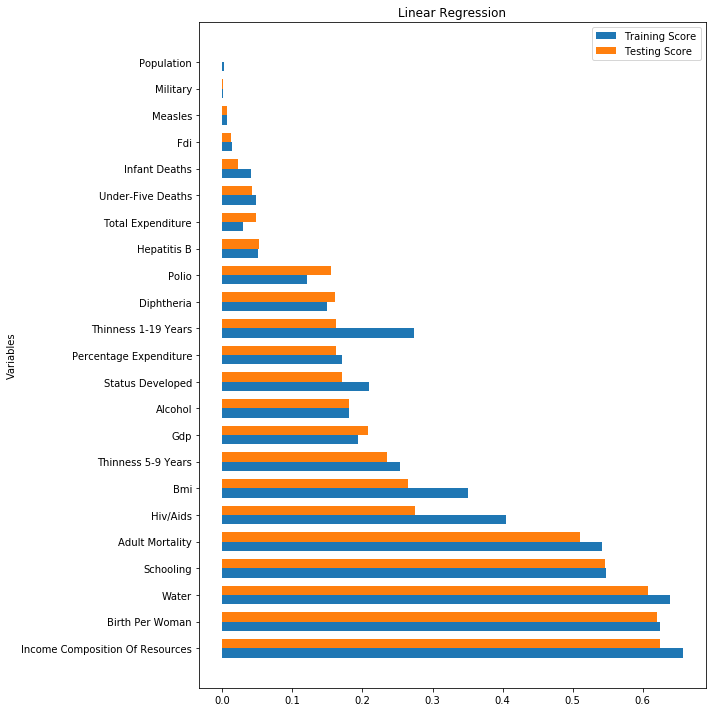

In [5]:
#Graphing Single Regression Results
lab = linearall.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.barh(y - width/2, linearall["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, linearall["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title('Linear Regression')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig('images/linearall.png')

In [6]:
#multilinear regression with 2 variables
others =alldata.columns[4:]
resultstoo = {}
for o1 in range(len(others)-1):
    value=others[o1]
    otherstoo = others[1:]
    for other in otherstoo:
        fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
        if value != other:
            theX = [value, other]
            theX.sort()
            X = fewdata[theX]
            y = fewdata["Life Expectancy"].values.reshape(-1, 1)
            #Split Data into Train and Test
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            model = LinearRegression()

            model.fit(X_train, y_train)
            training_score = model.score(X_train, y_train)
            testing_score = model.score(X_test, y_test)

            resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
scorestoo = pd.DataFrame(resultstoo)
scorestoo=scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
multilinear2["all"]=scorestoo
multilinear2["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Hiv/Aids & Income Composition Of Resources,0.74865,0.840115,Income Composition Of Resources,-0.691486,Hiv/Aids,34.9874,48.2124
Adult Mortality & Income Composition Of Resources,0.791711,0.779855,Adult Mortality,-0.0307512,Income Composition Of Resources,32.6276,53.5939
Birth Per Woman & Hiv/Aids,0.756844,0.777617,Birth Per Woman,-4.0312,Hiv/Aids,-0.693315,82.5711
Adult Mortality & Water,0.765335,0.768248,Adult Mortality,-0.030455,Water,0.279487,51.3496
Hiv/Aids & Schooling,0.749774,0.761334,Schooling,-0.804139,Hiv/Aids,2.00823,46.5317


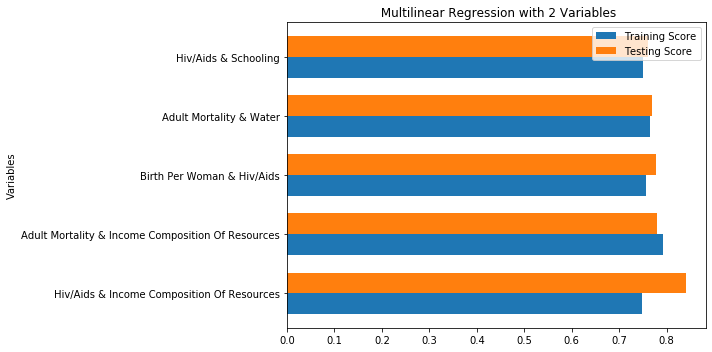

In [7]:
#Graphing 2Variable Regression Results

top5 = multilinear2["all"][:5]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 2 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all2.png')

In [8]:
#multilinear regression with 3 variables
others = alldata.columns[4:]
resultsthree ={}
for o1 in range(len(others)-2):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-1):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for other2 in othersthree:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                if (value != other) and (value != other2) and (other2 != other):
                    theX = [value, other, other2]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)
                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()
                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)
                
                    resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
scoresthree = pd.DataFrame(resultsthree)
scoresthree= scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
multilinear3["all"]=scoresthree
multilinear3["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Adult Mortality & Birth Per Woman & Income Composition Of Resources,0.816533,0.847451,Adult Mortality,-0.0266795,Birth Per Woman,-2.01654,Income Composition Of Resources,20.1417,66.8535
Hiv/Aids & Schooling & Water,0.805086,0.839539,Water,-0.674624,Schooling,1.10379,Hiv/Aids,0.191898,41.3049
Birth Per Woman & Gdp & Hiv/Aids,0.788588,0.831677,Birth Per Woman,-3.64653,Gdp,0.000144237,Hiv/Aids,-0.657311,80.5216
Adult Mortality & Income Composition Of Resources & Percentage Expenditure,0.775213,0.82835,Adult Mortality,-0.0324564,Income Composition Of Resources,28.9061,Percentage Expenditure,0.000273382,56.1234
Hiv/Aids & Income Composition Of Resources & Under-Five Deaths,0.759988,0.827615,Income Composition Of Resources,-0.673208,Hiv/Aids,34.9176,Under-Five Deaths,-0.00316645,48.437


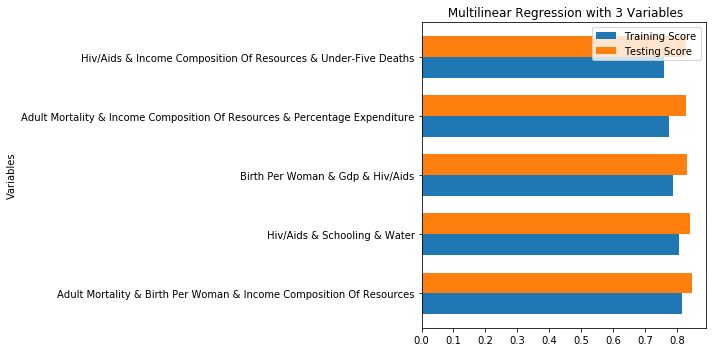

In [9]:
#Graphing 3Variable Regression Results

top5 = multilinear3["all"][:5]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 3 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all3.png')

In [10]:
#multilinear regression with 4 variables
others = alldata.columns[4:]
resultsfour ={}
for o1 in range(len(others)-3):
    value=others[o1]
    otherstoo = others[1:]
    for o2 in range(len(otherstoo)-2):
        other=otherstoo[o2+1]
        othersthree = otherstoo[1:]
        for o3 in range(len(othersthree)-1):
            other=otherstoo[o3+2]
            othersfour = othersthree[1:]
            for other3 in othersfour:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy()
                if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                    theX = [value, other, other2,other3]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
scoresfour = pd.DataFrame(resultsfour)
scoresfour = scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
multilinear4["all"]=scoresfour
multilinear4["all"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Adult Mortality & Income Composition Of Resources & Status Developed & Water,0.80945,0.847442,Adult Mortality,-0.027295,Water,18.505,Status Developed,1.31971,Income Composition Of Resources,0.15019,49.3286
Adult Mortality & Hepatitis B & Status Developed & Water,0.759294,0.836991,Adult Mortality,-0.027937,Water,0.00752238,Status Developed,3.64071,Hepatitis B,0.258122,51.5706
Hiv/Aids & Income Composition Of Resources & Schooling & Status Developed,0.787786,0.834997,Schooling,-0.679152,Income Composition Of Resources,22.2882,Status Developed,0.952732,Hiv/Aids,0.801082,44.6211
Adult Mortality & Birth Per Woman & Status Developed & Total Expenditure,0.760208,0.833933,Adult Mortality,-0.0286705,Birth Per Woman,-3.30387,Status Developed,2.22641,Total Expenditure,0.29313,81.8892
Birth Per Woman & Hiv/Aids & Status Developed & Water,0.801042,0.832971,Birth Per Woman,-1.80264,Water,-0.634401,Status Developed,3.29164,Hiv/Aids,0.170949,61.258


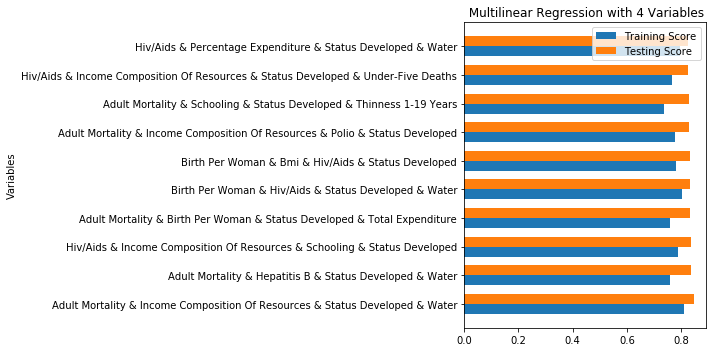

In [11]:
#Graphing 4Variable Regression Results

top5 = multilinear4["all"][:10]
lab = top5.index
y = np.arange(len(lab))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
ax.set_ylabel('Variables')
ax.set_title(f' Multilinear Regression with 4 Variables')
ax.set_yticks(y)
ax.set_yticklabels(lab)
ax.legend()
plt.tight_layout()
plt.savefig(f'images/all4.png')

# Health Vs NonHealth Variables

In [12]:
#Use if want to filter for type of variable
#cols[0] for health variables 
#cols[1] for non-health variables
cols = []
labels = ["health","nonhealth"]
cols.append(['Country', 'Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths','Hepatitis B','Measles', 'Bmi', 'Under-Five Deaths', 'Polio','Diphtheria', 'Hiv/Aids', 'Thinness 1-19 Years','Thinness 5-9 Years'])
cols.append(['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure','Gdp', 'Population','Income Composition Of Resources', 'Schooling','Fdi', 'Birth Per Woman', 'Water', 'Military', 'Status Developed'])
print(cols[1])

['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure', 'Gdp', 'Population', 'Income Composition Of Resources', 'Schooling', 'Fdi', 'Birth Per Woman', 'Water', 'Military', 'Status Developed']


In [13]:
#linear regression with variables
for col in range(len(cols)):
    results ={}
    others = cols[col][3:]
    for value in others:
        fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
        X = fewdata[[value]]
        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

        #Split Data into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        model = LinearRegression()

        model.fit(X_train, y_train)
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)

        results[value] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
        scores = pd.DataFrame(results)
        scores=scores.transpose().sort_values(by=['Testing Score'], ascending=False)
        linear1[labels[col]]=scores
linear1["health"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Adult Mortality,0.542481,0.507715,Adult Mortality,-0.0513187,78.4895
Bmi,0.315593,0.360215,Bmi,0.259394,59.8487
Hiv/Aids,0.390823,0.345394,Hiv/Aids,-1.09911,71.9507
Thinness 5-9 Years,0.244001,0.266145,Thinness 5-9 Years,-0.987639,74.4207
Thinness 1-19 Years,0.241282,0.258006,Thinness 1-19 Years,-0.973375,74.5949


In [14]:
linear1["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Water,0.624678,0.652572,Water,0.391472,36.9439
Birth Per Woman,0.615794,0.645057,Birth Per Woman,-4.92599,83.808
Income Composition Of Resources,0.655445,0.627561,Income Composition Of Resources,44.9003,40.3475
Schooling,0.538164,0.577332,Schooling,2.36089,40.682
Status Developed,0.185499,0.248483,Status Developed,10.5338,68.1267


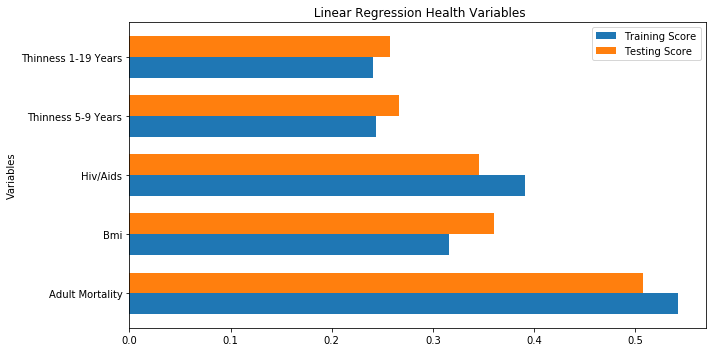

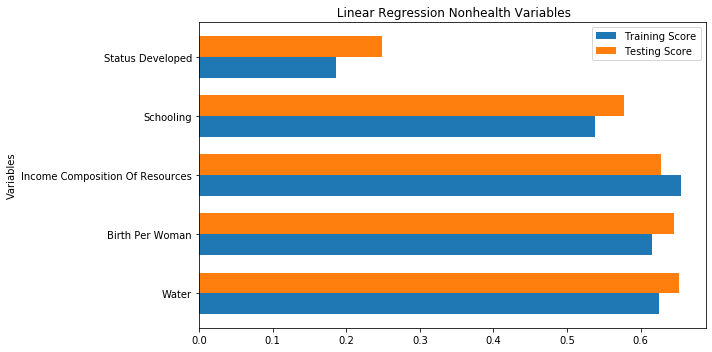

In [15]:
#Graphing 1Variable Regression Results
for label in labels:
    top5 = linear1[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}1.png')

In [16]:
#multilinear regression with 2 variables
for col in range(len(cols)):
    resultstoo ={}
    others = cols[col][3:]
    for o1 in range(len(others)-1):
        value=others[o1]
        otherstoo = others[1:]
        for other in otherstoo:
            fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
            if value != other:
                theX = [value, other]
                theX.sort()
                X = fewdata[theX]
                y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                #Split Data into Train and Test
                X_train, X_test, y_train, y_test = train_test_split(X, y)

                model = LinearRegression()

                model.fit(X_train, y_train)
                training_score = model.score(X_train, y_train)
                testing_score = model.score(X_test, y_test)

                resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
    scorestoo = pd.DataFrame(resultstoo)
    scorestoo=scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear2[labels[col]]=scorestoo
multilinear2["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Bmi,0.633478,0.659789,Adult Mortality,-0.0427197,Bmi,0.156883,70.8895
Adult Mortality & Hepatitis B,0.531217,0.607881,Adult Mortality,-0.0504943,Hepatitis B,0.0427376,74.8204
Adult Mortality & Thinness 5-9 Years,0.626804,0.583462,Adult Mortality,-0.0448015,Thinness 5-9 Years,-0.589033,80.2149
Adult Mortality & Diphtheria,0.584605,0.578895,Adult Mortality,-0.0471805,Diphtheria,0.108767,68.4644
Adult Mortality & Infant Deaths,0.553404,0.574241,Adult Mortality,-0.0514835,Infant Deaths,-0.0114541,78.9353


In [17]:
multilinear2["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Birth Per Woman & Gdp,0.650937,0.70694,Birth Per Woman,-4.42155,Gdp,0.000161391,81.441
Schooling & Water,0.672974,0.696803,Water,1.07728,Schooling,0.263777,34.319
Income Composition Of Resources & Water,0.718805,0.693006,Water,26.3376,Income Composition Of Resources,0.206982,35.132
Income Composition Of Resources & Status Developed,0.639346,0.692763,Income Composition Of Resources,42.474,Status Developed,1.50442,41.6376
Birth Per Woman & Water,0.673106,0.687497,Water,-2.52542,Birth Per Woman,0.228122,57.7742


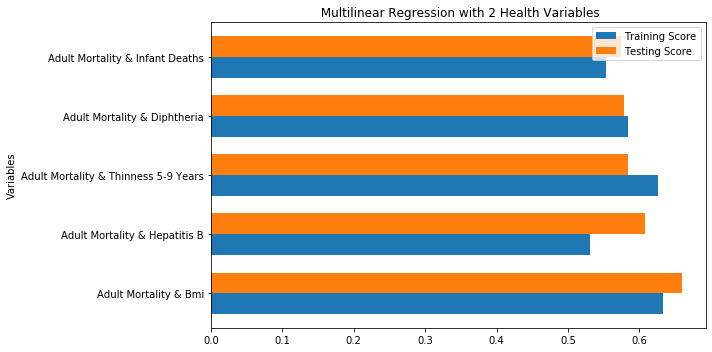

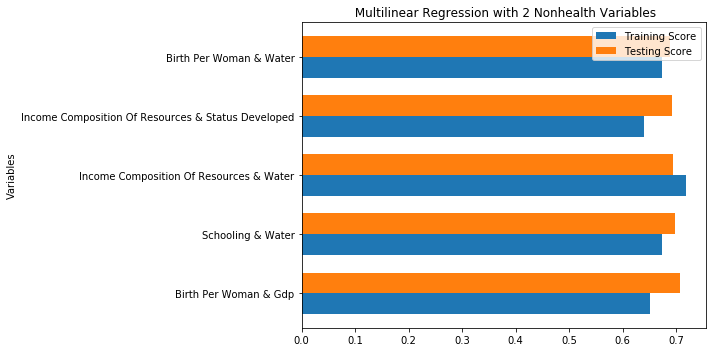

In [18]:
#Graphing 2Variable Regression Results
for label in labels:
    top5 = multilinear2[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 2 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [19]:
#multilinear regression with 3 variables
for col in range(len(cols)):
    others = cols[col][3:]
    resultsthree ={}
    for o1 in range(len(others)-2):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-1):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for other2 in othersthree:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                    if (value != other) and (value != other2) and (other2 != other):
                        theX = [value, other, other2]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()
                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
    scoresthree = pd.DataFrame(resultsthree)
    scoresthree= scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear3[labels[col]]=scoresthree
multilinear3["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Adult Mortality & Thinness 1-19 Years & Thinness 5-9 Years,0.590073,0.704437,Adult Mortality,-0.0423553,Thinness 5-9 Years,-0.411143,Thinness 1-19 Years,-0.265511,79.9694
Adult Mortality & Diphtheria & Thinness 5-9 Years,0.623084,0.699153,Adult Mortality,-0.0413495,Thinness 5-9 Years,0.0762717,Diphtheria,-0.561462,72.7027
Adult Mortality & Hepatitis B & Under-Five Deaths,0.52702,0.698415,Adult Mortality,-0.0481291,Under-Five Deaths,0.0331538,Hepatitis B,-0.00671676,75.3597
Adult Mortality & Bmi & Thinness 5-9 Years,0.656897,0.682106,Adult Mortality,-0.0411909,Thinness 5-9 Years,0.118763,Bmi,-0.3703,73.8826
Adult Mortality & Diphtheria & Thinness 1-19 Years,0.63779,0.666666,Adult Mortality,-0.0426644,Thinness 1-19 Years,0.078492,Diphtheria,-0.513806,72.6136


In [20]:
multilinear3["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Birth Per Woman & Income Composition Of Resources & Schooling,0.702436,0.771992,Birth Per Woman,-2.51907,Schooling,21.8831,Income Composition Of Resources,0.349291,58.3535
Income Composition Of Resources & Percentage Expenditure & Status Developed,0.615243,0.763049,Percentage Expenditure,40.0883,Status Developed,0.000377392,Income Composition Of Resources,0.864665,43.1158
Alcohol & Birth Per Woman & Income Composition Of Resources,0.713411,0.752315,Alcohol,-0.174067,Birth Per Woman,-2.9574,Income Composition Of Resources,25.6062,62.336
Birth Per Woman & Fdi & Income Composition Of Resources,0.713135,0.738839,Birth Per Woman,-2.6493,Fdi,0.00997495,Income Composition Of Resources,25.6408,60.5596
Fdi & Income Composition Of Resources & Water,0.706301,0.736613,Water,0.0113212,Fdi,27.2004,Income Composition Of Resources,0.200865,34.9332


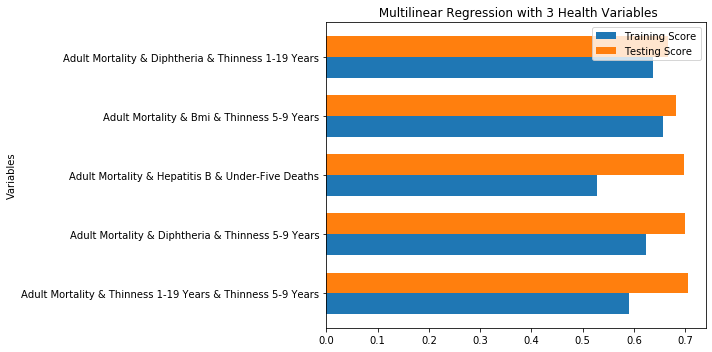

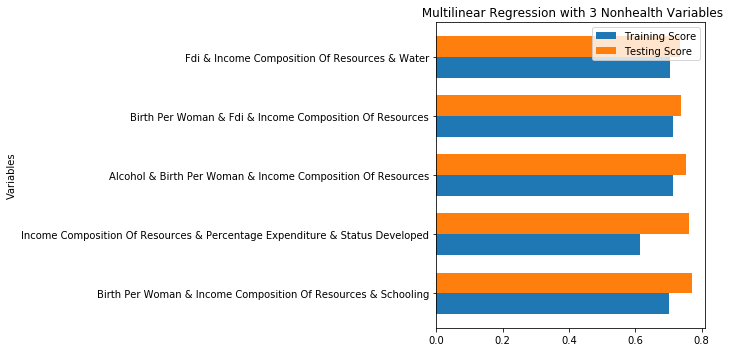

In [21]:
#Graphing 3Variable Regression Results
for label in labels:
    top5 = multilinear3[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 3 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [22]:
#multilinear regression with 4 variables
for col in range(len(cols)):
    others = cols[col][3:]
    resultsfour ={}
    for o1 in range(len(others)-3):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-2):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for o3 in range(len(othersthree)-1):
                other=otherstoo[o3+2]
                othersfour = othersthree[1:]
                for other3 in othersfour:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy()
                    if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                        theX = [value, other,other2,other3]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
    scoresfour = pd.DataFrame(resultsfour)
    scoresfour = scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear4[labels[col]]=scoresfour
multilinear4["health"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Adult Mortality & Bmi & Hiv/Aids & Status Developed,0.698542,0.73667,Adult Mortality,-0.0287629,Hiv/Aids,0.133223,Status Developed,-0.435145,Bmi,4.53326,69.5428
Adult Mortality & Bmi & Status Developed & Thinness 1-19 Years,0.676416,0.717358,Adult Mortality,-0.0385612,Thinness 1-19 Years,0.10635,Status Developed,4.18925,Bmi,-0.302383,72.9337
Adult Mortality & Bmi & Status Developed & Thinness 5-9 Years,0.676582,0.706751,Adult Mortality,-0.0371689,Thinness 5-9 Years,0.121416,Status Developed,4.21432,Bmi,-0.275396,71.942
Adult Mortality & Bmi & Diphtheria & Status Developed,0.692103,0.694512,Adult Mortality,-0.03893,Diphtheria,0.133269,Status Developed,0.0653011,Bmi,3.68477,65.0531
Adult Mortality & Diphtheria & Measles & Status Developed,0.614117,0.690052,Adult Mortality,-0.0433731,Diphtheria,0.0763701,Status Developed,-4.54669e-05,Measles,5.59216,69.6115


In [23]:
multilinear4["nonhealth"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Birth Per Woman & Income Composition Of Resources & Percentage Expenditure & Status Developed,0.710632,0.77372,Percentage Expenditure,-2.73638,Birth Per Woman,21.8534,Status Developed,0.000457242,Income Composition Of Resources,0.361822,62.8649
Income Composition Of Resources & Percentage Expenditure & Status Developed & Water,0.710867,0.755248,Percentage Expenditure,22.0761,Water,0.000423746,Status Developed,1.00048,Income Composition Of Resources,0.218629,36.3666
Birth Per Woman & Percentage Expenditure & Schooling & Status Developed,0.668799,0.745429,Percentage Expenditure,-3.21948,Birth Per Woman,0.000616195,Status Developed,0.907873,Schooling,0.521723,67.1374
Gdp & Income Composition Of Resources & Status Developed & Water,0.717645,0.731603,Income Composition Of Resources,6.56463e-05,Water,22.2005,Status Developed,1.28276,Gdp,0.209594,37.0384
Alcohol & Income Composition Of Resources & Status Developed & Water,0.721984,0.728458,Alcohol,-0.297416,Water,27.7733,Status Developed,3.15315,Income Composition Of Resources,0.202245,35.5368


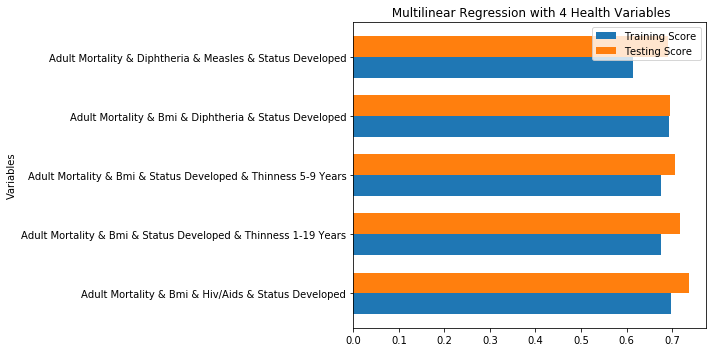

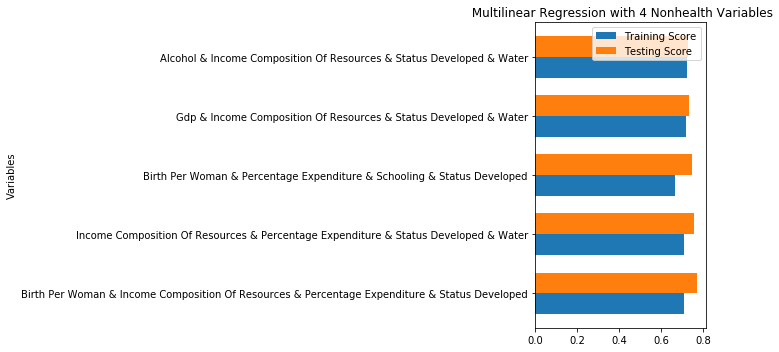

In [24]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear4[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 4 {label.title()} Variables')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# Developed Vs Developing Countries

In [25]:
#Create a Developing Dataset and Developed Dataset
developed = alldata.copy().rename(columns={"Status Developed":"Developed"})
developed = developed[developed.columns[1:]]
developing = alldata.copy()
developing["Status Developed"] = developing["Status Developed"].replace(0, 2).replace(1, 0).replace(2, 1)
developing = developing.rename(columns={"Status Developed":"Developing"})
developing = developing[developing.columns[1:]]
datasets = [developed, developing]
labels = ["Developed", "Developing"]

#Split Dataset into Developing and Developed Countries
developed = developed.drop(x for x in developed["Developed"].index if developed.loc[x]["Developed"] == 0)
developed = developed[developed.columns[:-1]]
developing = developing.drop(x for x in developing["Developing"].index if developing.loc[x]["Developing"] == 0)
developing = developing[developing.columns[:-1]]
developing.head()

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,...,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling,Fdi,Birth Per Woman,Water,Military
0,afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.849679,4.80,61.5,0.993455
1,afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,612.696514,327582.0,17.5,17.5,0.476,10.0,0.209790,4.98,58.8,1.298013
2,afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.234965,5.17,56.2,1.076950
3,afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.284095,5.38,53.5,1.175417
4,afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.293039,5.60,50.9,1.821346


In [26]:
#Creating Labels and columns list
datasets = [developed, developing]
labels = ["developed", "developing"]

In [27]:
#Linear regression 
regress1=[]
for index in range(len(datasets)):
    label = labels[index]
    results ={}
    for value in alldata.columns[4:]:
        #Choose columns
        fewdata = alldata[["Country","Year","Life Expectancy",value]].copy()
        X = fewdata[value].values.reshape(-1, 1)
        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

        #Split Data into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        model = LinearRegression()

        model.fit(X_train, y_train)
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)

        results[value] = {"Training Score":training_score,"Testing Score": testing_score, "Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
    scores = pd.DataFrame(results)
    scores = scores.transpose().sort_values(by=['Testing Score'], ascending=False)
    regress1.append(scores)
    linear1[labels[index]] = scores
linear1["developing"]

,Training Score,Testing Score,Coefficent,y intercept
Income Composition Of Resources,0.637612,0.691548,4.461385e+01,40.653258
Water,0.633003,0.624829,4.011348e-01,35.974413
Birth Per Woman,0.624967,0.616856,-4.842049e+00,83.601215
Adult Mortality,0.519769,0.570565,-5.219775e-02,78.462262
Schooling,0.544646,0.554296,2.350192e+00,40.826562
Hiv/Aids,0.373042,0.397386,-1.030381e+00,71.725216
Bmi,0.326618,0.331772,2.653288e-01,59.768203
Thinness 1-19 Years,0.231591,0.282625,-9.483846e-01,74.487385
Alcohol,0.170873,0.205155,9.178301e-01,65.355565
Thinness 5-9 Years,0.268091,0.194350,-1.030392e+00,74.762970


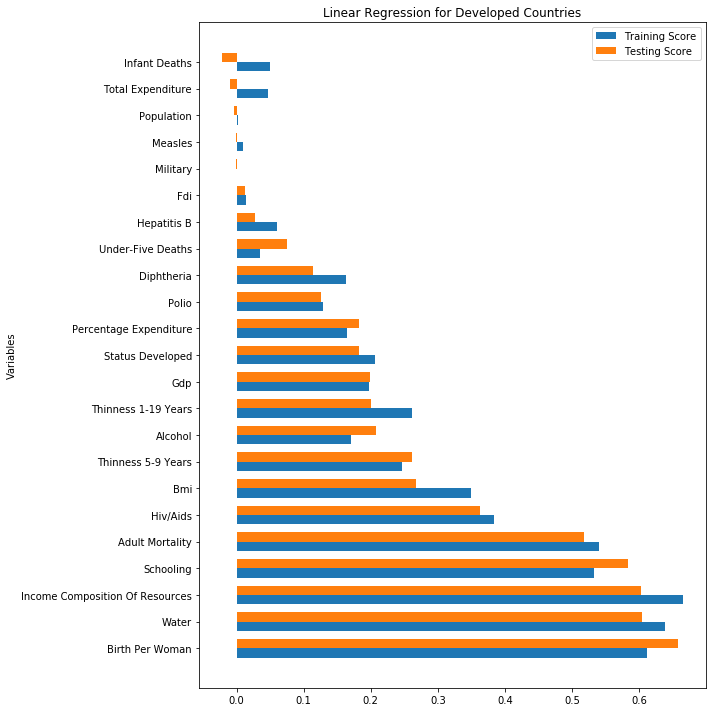

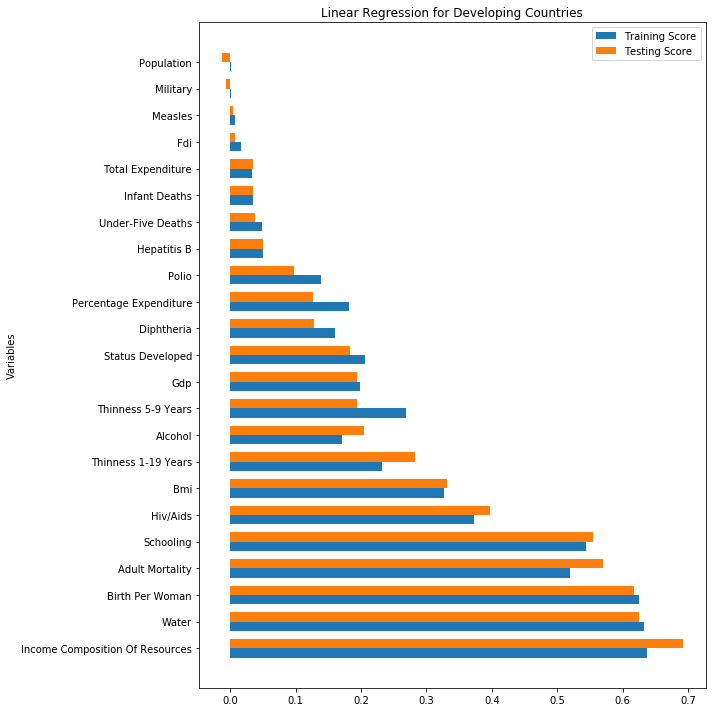

In [28]:
#Graphing Single Regression Results
for label in labels:
    lab = linear1[label].index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 10))
    rects1 = ax.barh(y - width/2, linear1[label]["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, linear1[label]["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f'Linear Regression for {label.title()} Countries')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/linear1{label}.png')

In [29]:
#multilinear regression with 2 variables
for index in range(len(datasets)):
    label = labels[index]
    resultstoo ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-1):
        value=others[o1]
        otherstoo = others[1:]
        for other in otherstoo:
            fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy()
            if (value != other):
                theX = [value, other]
                theX.sort()
                X = fewdata[theX]
                y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                #Split Data into Train and Test
                X_train, X_test, y_train, y_test = train_test_split(X, y)

                model = LinearRegression()

                model.fit(X_train, y_train)
                training_score = model.score(X_train, y_train)
                testing_score = model.score(X_test, y_test)

                resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
    scorestoo = pd.DataFrame(resultstoo)
    scorestoo = scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear2[labels[index]] = scorestoo
multilinear2["developing"]

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Income Composition Of Resources,0.783811,0.804326,Adult Mortality,-0.0311551,Income Composition Of Resources,32.338,53.7665
Adult Mortality & Water,0.753362,0.802042,Adult Mortality,-0.0311013,Water,0.276382,51.749
Hiv/Aids & Income Composition Of Resources,0.772139,0.781542,Income Composition Of Resources,-0.669794,Hiv/Aids,37.1312,46.8314
Diphtheria & Income Composition Of Resources,0.620296,0.768316,Income Composition Of Resources,0.0392702,Diphtheria,41.0523,39.585
Hiv/Aids & Water,0.758007,0.764302,Water,-0.69245,Hiv/Aids,0.322168,43.9837
...,...,...,...,...,...,...,...
Fdi & Military,0.013816,0.00953568,Fdi,0.0393778,Military,-0.300377,70.1198
Measles & Military,0.00870109,0.00539697,Measles,-7.2217e-05,Military,-0.138614,70.3033
Fdi & Population,0.0147628,0.0041021,Fdi,0.0604443,Population,-2.84101e-09,69.6435
Military & Population,0.00190501,-0.00374236,Population,-0.0838822,Military,-4.22511e-09,70.2831


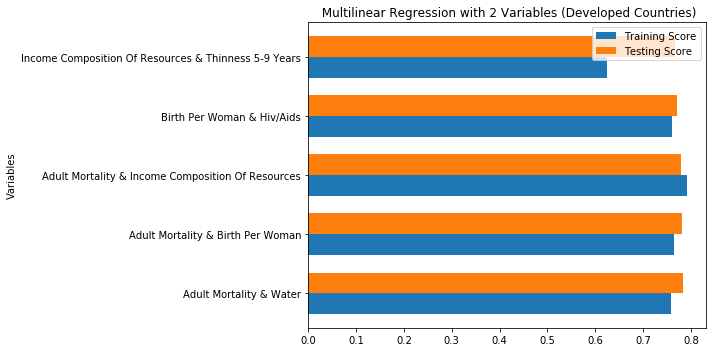

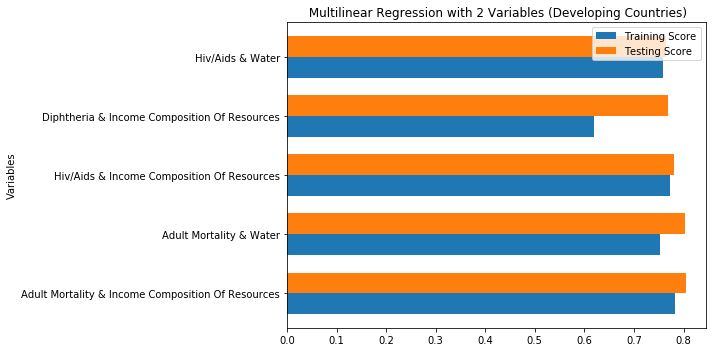

In [30]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear2[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 2 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [31]:
#multilinear regression with 3 variables
for index in range(len(datasets)):
    label = labels[index]
    resultsthree ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-2):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-1):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for other2 in othersthree:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy()
                if (value != other) and (value != other2) and (other2 != other):
                    theX = [value, other,other2]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1,1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
    scoresthree = pd.DataFrame(resultsthree)
    scoresthree=scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear3[labels[index]]=scoresthree
multilinear3["developing"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Hiv/Aids & Schooling & Water,0.805073,0.844605,Schooling,-0.677134,Water,1.10959,Hiv/Aids,0.198364,40.6337
Birth Per Woman & Hiv/Aids & Income Composition Of Resources,0.821304,0.842456,Birth Per Woman,-2.13867,Income Composition Of Resources,-0.62433,Hiv/Aids,22.9864,62.0713
Adult Mortality & Income Composition Of Resources & Military,0.776069,0.836702,Adult Mortality,-0.0304017,Military,32.4068,Income Composition Of Resources,0.250766,53.1439
Adult Mortality & Income Composition Of Resources & Thinness 5-9 Years,0.782099,0.831721,Adult Mortality,-0.0275935,Income Composition Of Resources,30.6693,Thinness 5-9 Years,-0.218494,55.3376
Adult Mortality & Birth Per Woman & Income Composition Of Resources,0.821754,0.826787,Adult Mortality,-0.0257161,Birth Per Woman,-2.04338,Income Composition Of Resources,19.9749,66.6887


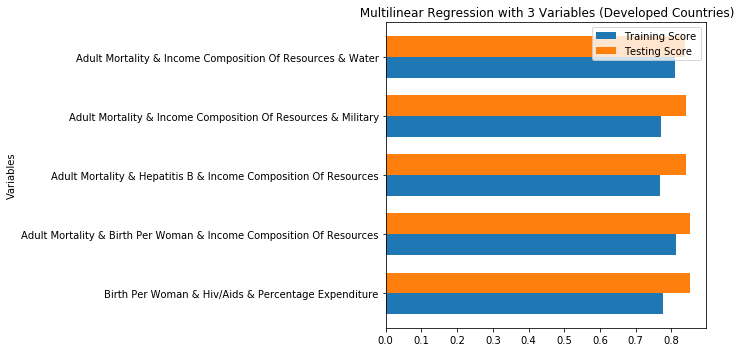

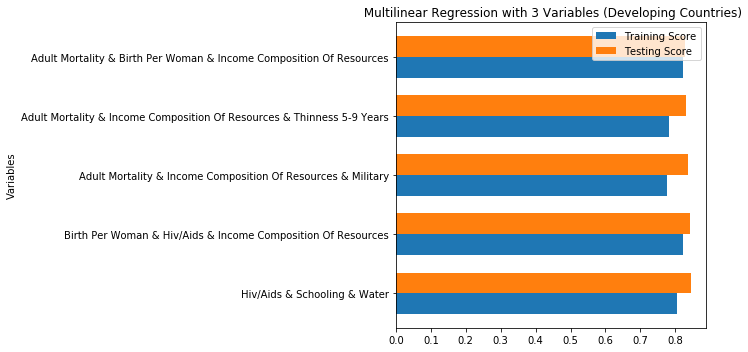

In [32]:
#Graphing 3Variable Regression Results
for label in labels:
    top5 = multilinear3[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 3 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [33]:
#multilinear regression with 4 variables
for index in range(len(datasets)):
    label = labels[index]
    resultsfour ={}
    others = list(datasets[index].columns[3:])
    for o1 in range(len(others)-3):
        value=others[o1]
        otherstoo = others[1:]
        for o2 in range(len(otherstoo)-2):
            other=otherstoo[o2+1]
            othersthree = otherstoo[1:]
            for o3 in range(len(othersthree)-1):
                other=otherstoo[o3+2]
                othersfour = othersthree[1:]
                for other3 in othersfour:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy().dropna(how="any")
                    if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                        theX = [value, other,other2,other3]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
    scoresfour = pd.DataFrame(resultsfour)
    scoresfour =scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
    multilinear4[labels[index]] = scoresfour
multilinear4["developing"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Adult Mortality & Birth Per Woman & Income Composition Of Resources & Military,0.818343,0.838591,Adult Mortality,-0.0271519,Birth Per Woman,-1.83163,Military,20.3424,Income Composition Of Resources,0.234688,65.8917
Adult Mortality & Hiv/Aids & Income Composition Of Resources & Military,0.812981,0.835554,Adult Mortality,-0.0203865,Income Composition Of Resources,-0.392675,Military,31.8394,Hiv/Aids,0.307039,52.4884
Adult Mortality & Fdi & Income Composition Of Resources & Military,0.773991,0.830763,Adult Mortality,-0.0314984,Fdi,0.00647444,Military,31.5453,Income Composition Of Resources,0.245774,53.9231
Adult Mortality & Birth Per Woman & Military & Thinness 5-9 Years,0.777284,0.830678,Adult Mortality,-0.0281454,Birth Per Woman,-3.24598,Military,0.126492,Thinness 5-9 Years,-0.319799,84.9813
Adult Mortality & Birth Per Woman & Military & Schooling,0.791678,0.82981,Adult Mortality,-0.029482,Birth Per Woman,-2.19357,Military,0.0455055,Schooling,0.875652,70.1754


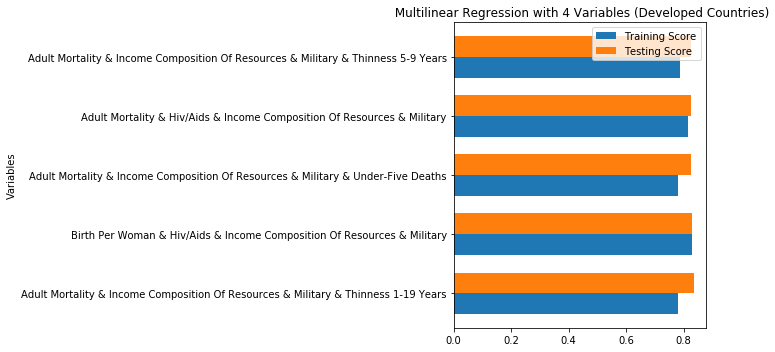

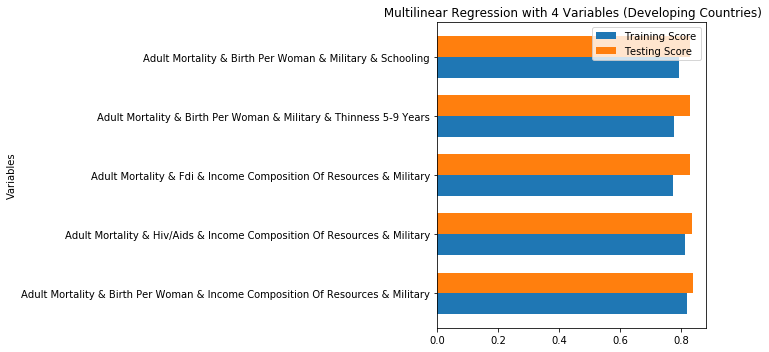

In [34]:
#Graphing 4Variable Regression Results
for label in labels:
    top5 = multilinear4[label][:5]
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Multilinear Regression with 4 Variables ({label.title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# Developed Vs Developing Countries For Different Factors

In [35]:
labels = ["health","nonhealth"]
datalabels = ["developed", "developing"]
thelabels = ["health_developed","health_developing","nonhealth_developed","nonhealth_developing"]
cols = []
cols.append(['Country', 'Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths','Hepatitis B','Measles', 'Bmi', 'Under-Five Deaths', 'Polio','Diphtheria', 'Hiv/Aids', 'Thinness 1-19 Years','Thinness 5-9 Years'])
cols.append(['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure','Gdp', 'Population','Income Composition Of Resources', 'Schooling','Fdi', 'Birth Per Woman', 'Water', 'Military'])
print(cols[1])

['Country', 'Year', 'Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure', 'Gdp', 'Population', 'Income Composition Of Resources', 'Schooling', 'Fdi', 'Birth Per Woman', 'Water', 'Military']


In [36]:
#Linear regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        results ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for value in others:
            fewdata = alldata[["Country","Year","Life Expectancy",value]].copy().dropna(how="any")
            X = fewdata[[value]]
            y = fewdata["Life Expectancy"].values.reshape(-1, 1)

            #Split Data into Train and Test
            X_train, X_test, y_train, y_test = train_test_split(X, y)

            model = LinearRegression()

            model.fit(X_train, y_train)
            training_score = model.score(X_train, y_train)
            testing_score = model.score(X_test, y_test)

            results[value] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0], "y intercept": model.intercept_[0]} 
            scores = pd.DataFrame(results)
            scores=scores.transpose().sort_values(by=['Testing Score'], ascending=False)
            linear1[label] = scores
linear1["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,y intercept
Adult Mortality,0.539645,0.51853,Adult Mortality,-0.05192,78.4544
Hiv/Aids,0.381805,0.371835,Hiv/Aids,-1.03676,71.8317
Bmi,0.342729,0.284043,Bmi,0.271849,59.4139
Thinness 5-9 Years,0.243313,0.271069,Thinness 5-9 Years,-0.969529,74.6035
Thinness 1-19 Years,0.245551,0.249953,Thinness 1-19 Years,-0.987569,74.4306


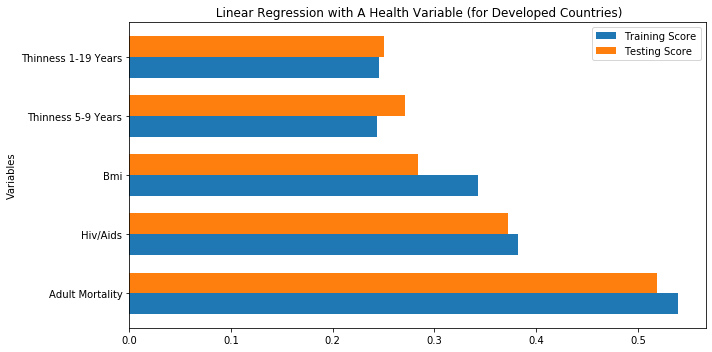

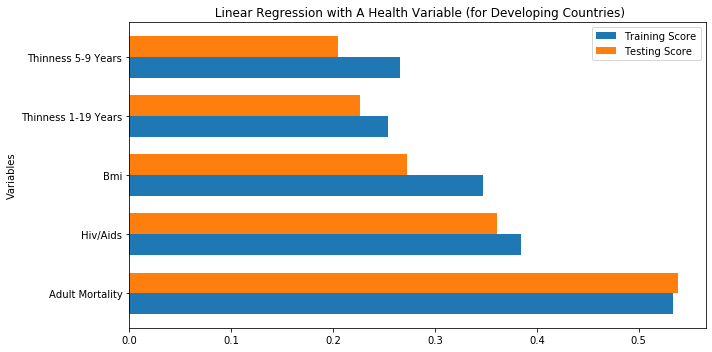

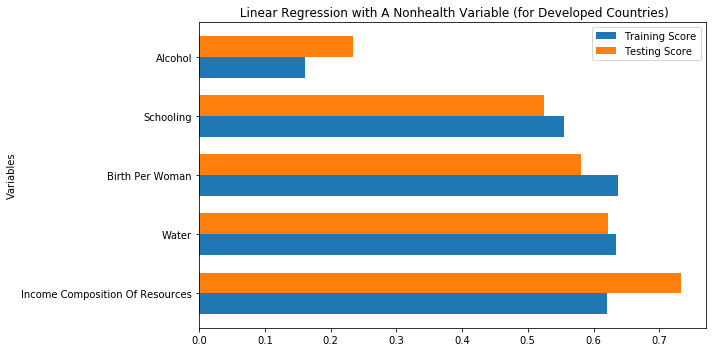

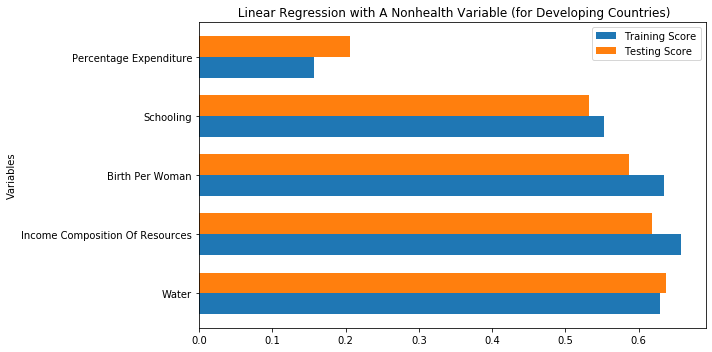

In [37]:
#Graphing Regression Results
for label in thelabels:
    top5 = linear1[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with A {titlepart[0].title()} Variable (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}1.png')

In [38]:
#2 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        resultstoo ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-1):
            value=others[o1]
            otherstoo = others[1:]
            for other in otherstoo:
                fewdata = alldata[["Country","Year","Life Expectancy",value, other]].copy().dropna(how="any")
                if (value != other):
                    theX = [value, other]
                    theX.sort()
                    X = fewdata[theX]
                    y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                    #Split Data into Train and Test
                    X_train, X_test, y_train, y_test = train_test_split(X, y)

                    model = LinearRegression()

                    model.fit(X_train, y_train)
                    training_score = model.score(X_train, y_train)
                    testing_score = model.score(X_test, y_test)

                    resultstoo[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1], "y intercept": model.intercept_[0]} 
        scorestoo = pd.DataFrame(resultstoo)
        scorestoo = scorestoo.transpose().sort_values(by=['Testing Score'], ascending=False)
        multilinear2[label] = scorestoo
multilinear2["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,y intercept
Adult Mortality & Polio,0.535876,0.659102,Adult Mortality,-0.0474505,Polio,0.0776494,71.2723
Adult Mortality & Bmi,0.636948,0.647033,Adult Mortality,-0.0430124,Bmi,0.159935,70.8792
Adult Mortality & Thinness 1-19 Years,0.621112,0.612692,Adult Mortality,-0.0455838,Thinness 1-19 Years,-0.611863,80.2528
Adult Mortality & Thinness 5-9 Years,0.625164,0.586908,Adult Mortality,-0.0453021,Thinness 5-9 Years,-0.558164,80.1019
Adult Mortality & Measles,0.526191,0.586374,Adult Mortality,-0.0505898,Measles,-8.44305e-05,78.2845


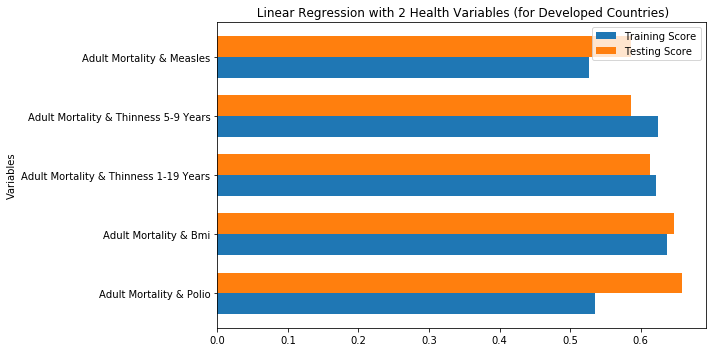

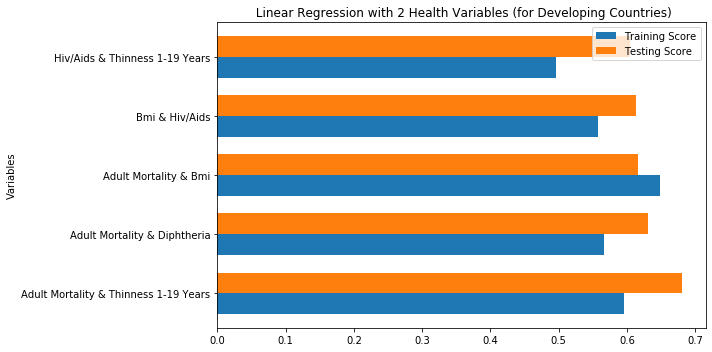

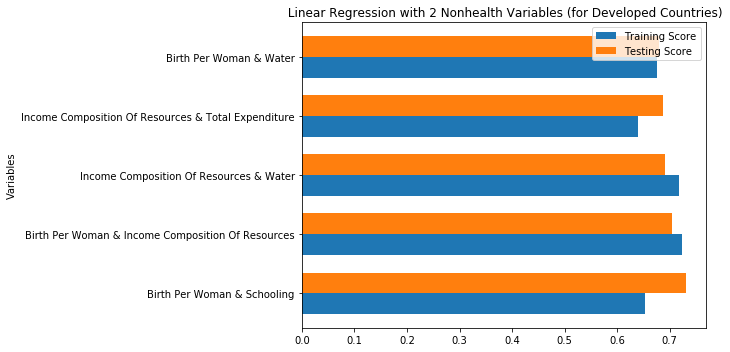

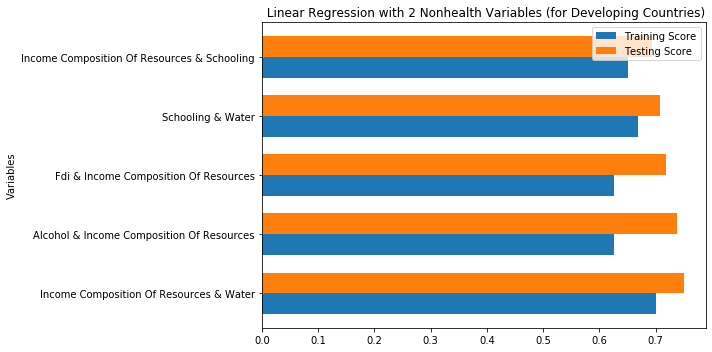

In [39]:
#Graphing 2 Variable Regression Results
for label in thelabels:
    top5 = multilinear2[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 2 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}2.png')

In [40]:
#3 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        resultthree ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-2):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-1):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for other2 in othersthree:
                    fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2]].copy().dropna(how="any")
                    if (value != other) and (value != other2) and (other2 != other):
                        theX = [value, other,other2]
                        theX.sort()
                        X = fewdata[theX]
                        y = fewdata["Life Expectancy"].values.reshape(-1,1)

                        #Split Data into Train and Test
                        X_train, X_test, y_train, y_test = train_test_split(X, y)

                        model = LinearRegression()

                        model.fit(X_train, y_train)
                        training_score = model.score(X_train, y_train)
                        testing_score = model.score(X_test, y_test)

                        resultsthree[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score,"Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2], "y intercept": model.intercept_[0]} 
        scoresthree = pd.DataFrame(resultsthree)
        scoresthree=scoresthree.transpose().sort_values(by=['Testing Score'], ascending=False)
        multilinear3[label]=scoresthree
multilinear3["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,y intercept
Hiv/Aids & Schooling & Water,0.805073,0.844605,Schooling,-0.677134,Water,1.10959,Hiv/Aids,0.198364,40.6337
Birth Per Woman & Hiv/Aids & Income Composition Of Resources,0.821304,0.842456,Birth Per Woman,-2.13867,Income Composition Of Resources,-0.62433,Hiv/Aids,22.9864,62.0713
Adult Mortality & Income Composition Of Resources & Military,0.776069,0.836702,Adult Mortality,-0.0304017,Military,32.4068,Income Composition Of Resources,0.250766,53.1439
Adult Mortality & Income Composition Of Resources & Thinness 5-9 Years,0.782099,0.831721,Adult Mortality,-0.0275935,Income Composition Of Resources,30.6693,Thinness 5-9 Years,-0.218494,55.3376
Adult Mortality & Birth Per Woman & Income Composition Of Resources,0.821754,0.826787,Adult Mortality,-0.0257161,Birth Per Woman,-2.04338,Income Composition Of Resources,19.9749,66.6887


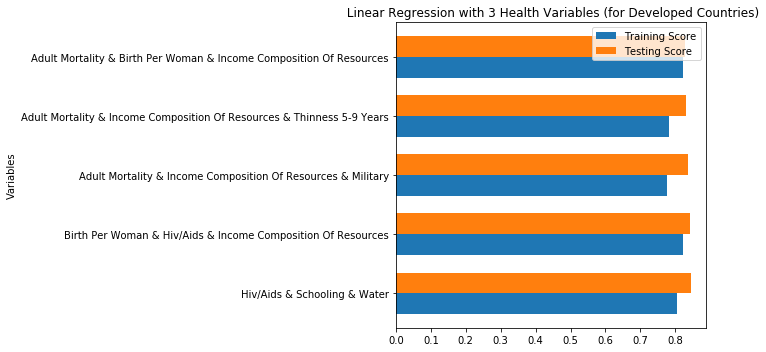

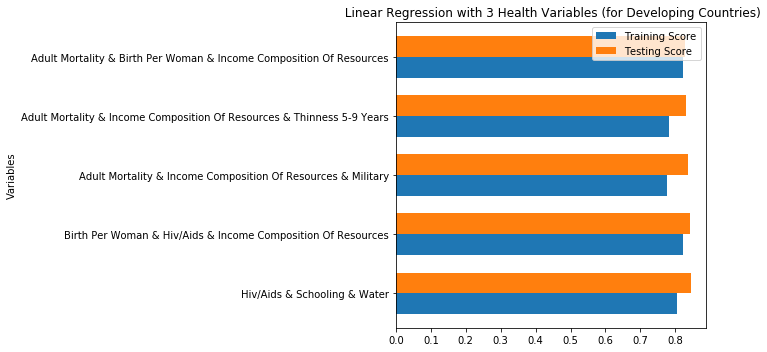

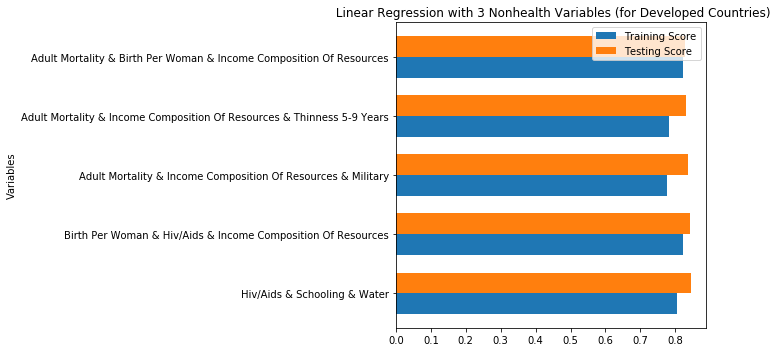

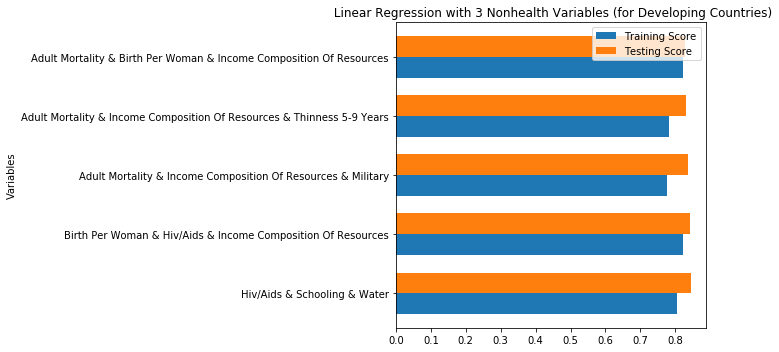

In [41]:
#Graphing 3 Variable Regression Results
for label in thelabels:
    top5 = multilinear3[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 3 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}3.png')

In [42]:
#4 variable regression
for index in range(len(datasets)):
    datalabel = datalabels[index]
    for col in range(len(cols)):
        resultsfour ={}
        label = labels[col] + "_" + datalabel
        others = cols[col][3:]
        for o1 in range(len(others)-3):
            value=others[o1]
            otherstoo = others[1:]
            for o2 in range(len(otherstoo)-2):
                other=otherstoo[o2+1]
                othersthree = otherstoo[1:]
                for o3 in range(len(othersthree)-1):
                    other=otherstoo[o3+2]
                    othersfour = othersthree[1:]
                    for other3 in othersfour:
                        fewdata = alldata[["Country","Year","Life Expectancy",value, other, other2,other3]].copy().dropna(how="any")
                        if (value != other) and (value != other2) and (other2 != other) and (value != other3) and (other3 != other2) and (other3 != other):
                            theX = [value, other,other2,other3]
                            theX.sort()
                            X = fewdata[theX]
                            y = fewdata["Life Expectancy"].values.reshape(-1, 1)

                            #Split Data into Train and Test
                            X_train, X_test, y_train, y_test = train_test_split(X, y)

                            model = LinearRegression()

                            model.fit(X_train, y_train)
                            training_score = model.score(X_train, y_train)
                            testing_score = model.score(X_test, y_test)

                            resultsfour[" & ".join(theX)] = {"Training Score":training_score,"Testing Score": testing_score, "Variable":value, f"Coefficent": model.coef_[0][0],"Other Variable":other,f"Coefficent2": model.coef_[0][1],"Other Variable2":other2,f"Coefficent3": model.coef_[0][2],"Other Variable3":other3,f"Coefficent4": model.coef_[0][3], "y intercept": model.intercept_[0]} 
        scoresfour = pd.DataFrame(resultsfour)
        scoresfour =scoresfour.transpose().sort_values(by=['Testing Score'], ascending=False)
        multilinear4[label] = scoresfour
multilinear4["health_developed"].head()

,Training Score,Testing Score,Variable,Coefficent,Other Variable,Coefficent2,Other Variable2,Coefficent3,Other Variable3,Coefficent4,y intercept
Adult Mortality & Bmi & Diphtheria & Military,0.661156,0.690572,Adult Mortality,-0.0385923,Diphtheria,0.153749,Military,0.0743886,Bmi,-0.159313,64.2319
Adult Mortality & Measles & Military & Thinness 1-19 Years,0.59717,0.682481,Adult Mortality,-0.0448064,Thinness 1-19 Years,-2.16068e-05,Military,0.0514165,Measles,-0.590653,79.9862
Adult Mortality & Diphtheria & Military & Thinness 1-19 Years,0.63722,0.672503,Adult Mortality,-0.0433151,Thinness 1-19 Years,0.079985,Military,0.0945971,Diphtheria,-0.518542,72.4891
Adult Mortality & Military & Thinness 1-19 Years & Under-Five Deaths,0.603598,0.666657,Adult Mortality,-0.0454876,Thinness 1-19 Years,0.0411555,Military,-0.563138,Under-Five Deaths,-0.000515958,79.9889
Adult Mortality & Bmi & Hiv/Aids & Military,0.67912,0.661212,Adult Mortality,-0.0299398,Hiv/Aids,0.165596,Military,-0.447558,Bmi,-0.13224,69.724


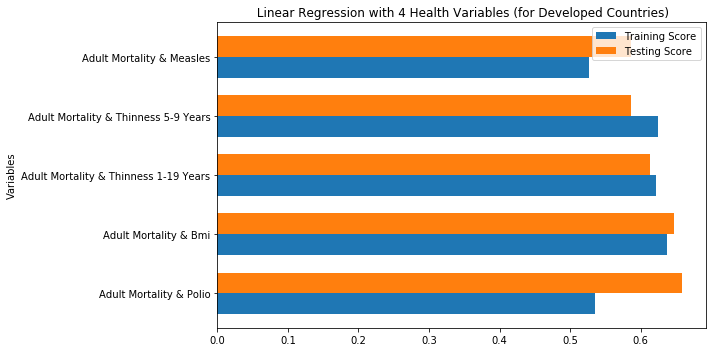

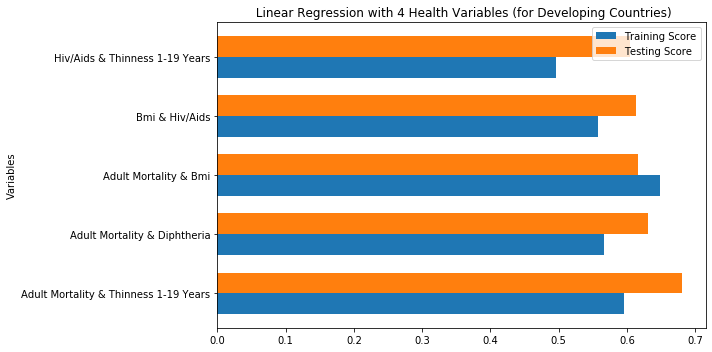

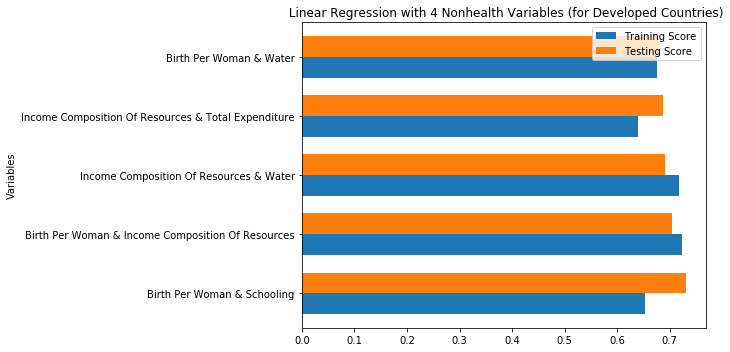

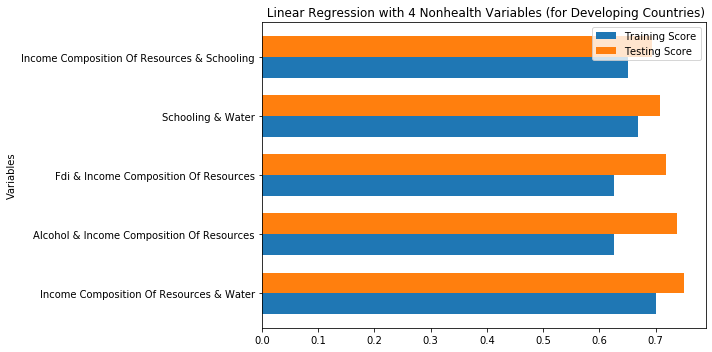

In [43]:
#Graphing 4 Variable Regression Results
for label in thelabels:
    top5 = multilinear2[label][:5]
    titlepart = label.split("_")
    lab = top5.index
    y = np.arange(len(lab))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.barh(y - width/2, top5["Training Score"],width, label="Training Score")
    rects2 = ax.barh(y + width/2, top5["Testing Score"],width, label="Testing Score")
    ax.set_ylabel('Variables')
    ax.set_title(f' Linear Regression with 4 {titlepart[0].title()} Variables (for {titlepart[1].title()} Countries)')
    ax.set_yticks(y)
    ax.set_yticklabels(lab)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'images/{label}4.png')

# All the Regression Datasets

In [44]:
#Grouping all to one list
allregressions= []
allregressions.append(linear1)
allregressions.append(multilinear2)
allregressions.append(multilinear3)
allregressions.append(multilinear4)

In [46]:
datalab = ["linear1","multilinear2","multilinear3","multilinear4"]
for x in range(len(allregressions)):
    for y in list(allregressions[x].keys()):
        allregressions[x][y].to_csv(f'regressions/{datalab[x]}_{y}.csv')    